In [1]:
# Importing Gempy
import  gempy                   as     gp
from    gempy.core.grid_modules import section_utils

# Importing pygimli
import  pygimli                 as     pg
import  pygimli.meshtools       as     mt

# Importing auxiliary libraries
import  numpy                   as     np
import  pandas                  as     pd
import  matplotlib.pyplot       as     plt
from    matplotlib.patches      import PathPatch 
import  os
from    IPython.display         import set_matplotlib_formats
from    pyvista                 import set_plot_theme

set_plot_theme('document')
plt.rcParams["figure.figsize"] = (20,20)
%matplotlib inline

# Setting options
np.random.seed(420)
pd.set_option('precision', 2)

Not subsurface compatibility available


### Model Parameters

In [2]:
# extent
x0 = 0
x1 = 150
y0 = 0
y1 = 150 
z0 = -60
z1 = 5
# resolution
nx = 120
ny = 120
nz = 200

section_idx = int(50 / ((y1-y0)/ny)) # to get y value that intersects close to cone axis

### Creating Gempy subsurface models

Active grids: ['regular']
Active grids: ['regular' 'sections']
Setting kriging parameters to their default values.
Compiling theano function...


C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(
C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(
C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are prob

Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range             221.87
$C_o$            1172.02
drift equations      [3]


C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


Active grids: ['regular']
Active grids: ['regular' 'sections']
Setting kriging parameters to their default values.
Compiling theano function...


C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(
C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(
C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are prob

Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range             221.87
$C_o$            1172.02
drift equations      [3]


C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


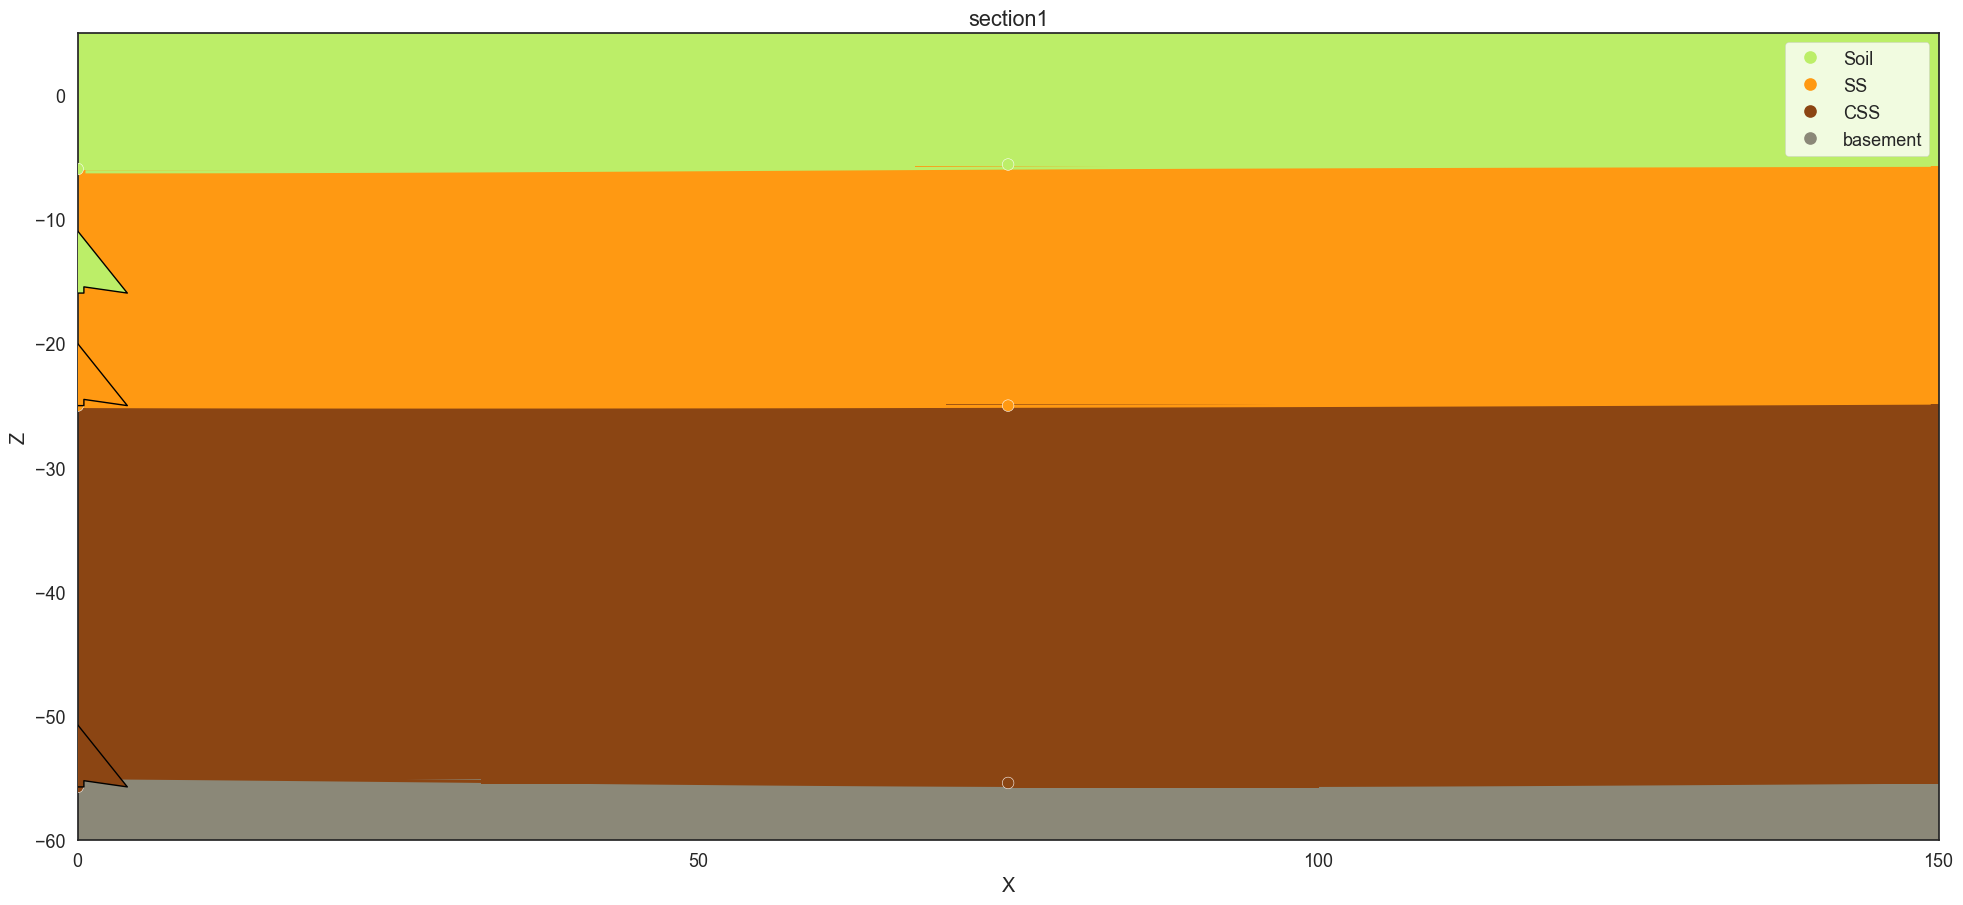

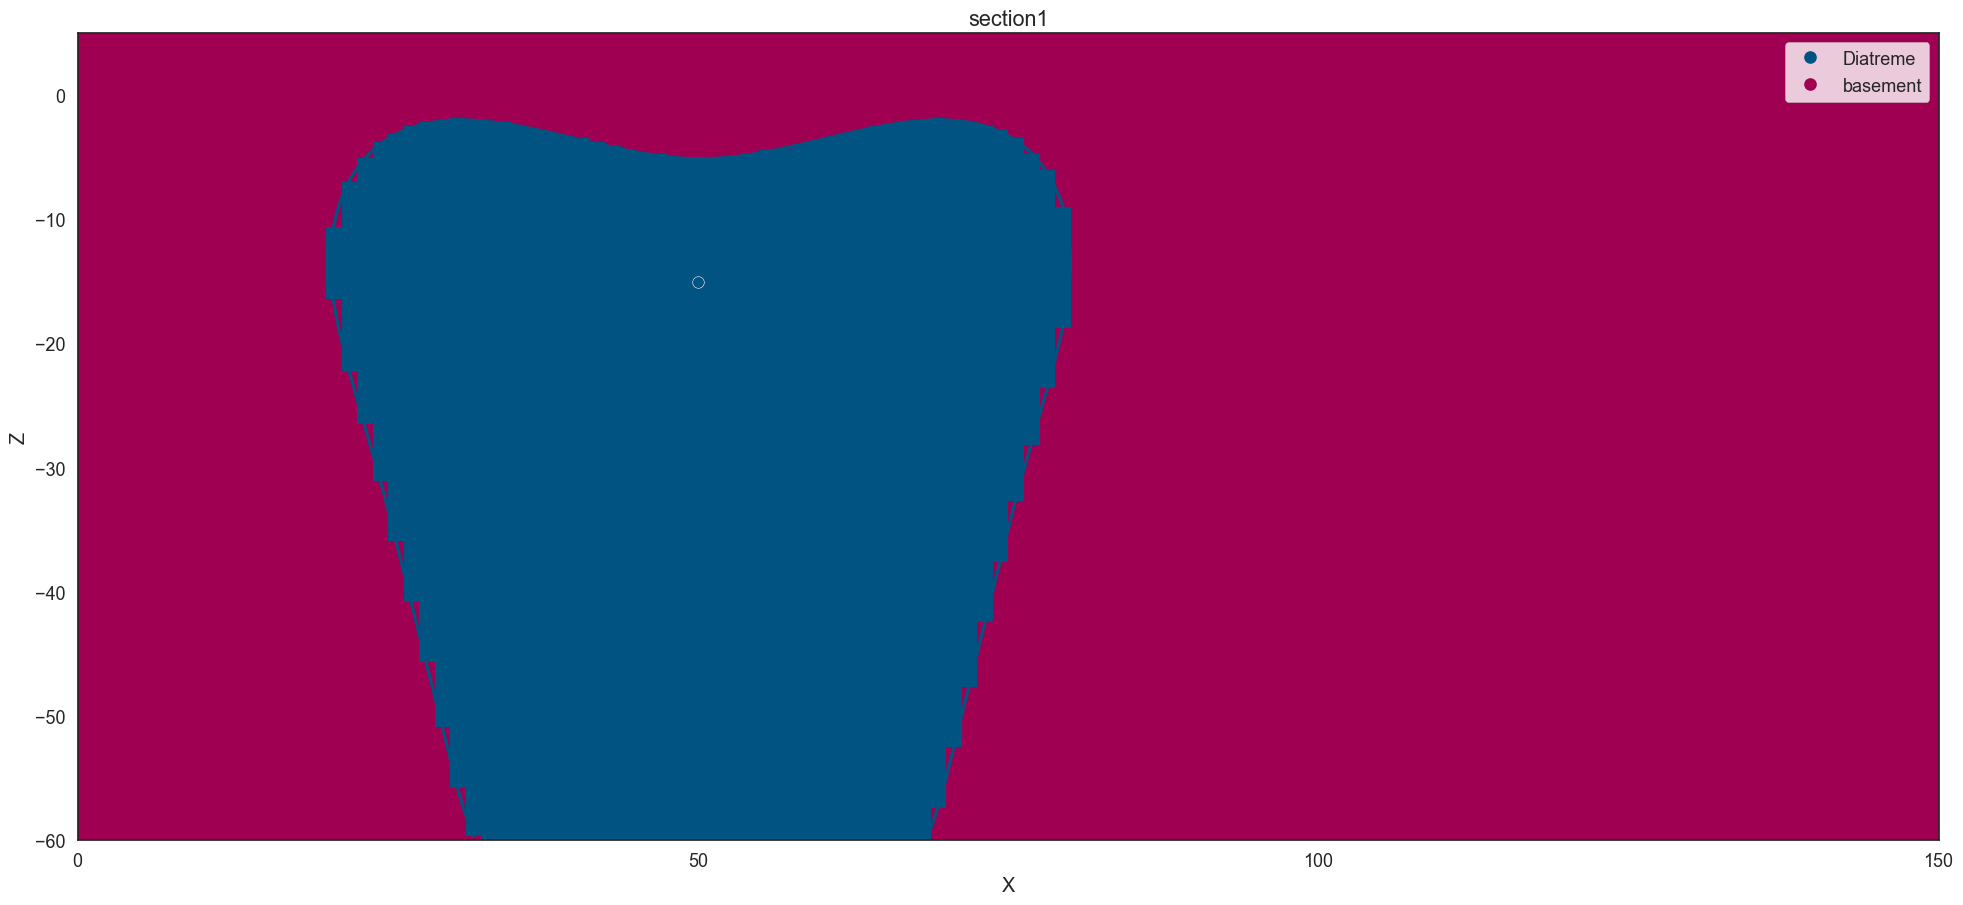

In [3]:
# Layers
geo_model_layers = gp.create_model('simple_layers')

# Importing the data from CSV-files and setting extent and resolution
gp.init_data(geo_model_layers, [x0, x1, y0, y1, z0, z1], [nx,ny,nz],
             path_i='Gempy-input/RM_surface_points_layers.csv', path_o='Gempy-input/RM_orientations_layers.csv',
             default_values=True)

# Mapping layers to surface
gp.map_stack_to_surfaces(geo_model_layers,
                         {"Layers":('Soil','SS','CSS','basement')},
                         remove_unused_series=True)

# Adjusting colors
geo_model_layers.surfaces.colors.change_colors({'CSS': '#8b4513','SS':'#ff9912',
                                                'basement':'#8b8878','Soil':'#bcee68'})

# # Adding Topography
# geo_model_layers.set_topography(source='saved', filepath='model_topo.npy')

# Adding cross-section
section_dict = {'section1': ([x0, 50], [x1, 50], [nx, nz])}
geo_model_layers.set_section_grid(section_dict)

# Solving
gp.set_interpolator(geo_model_layers, compile_theano=True, theano_optimizer='fast_compile')
sol_layers = gp.compute_model(geo_model_layers, debug=False)
# Show result
gp.plot_2d(geo_model_layers, section_names=['section1'])

geo_model_diatreme = gp.create_model('simple_diatreme')

# Diatreme model
# Importing the data from CSV-files and setting extent and resolution
gp.init_data(geo_model_diatreme, [x0, x1, y0, y1, z0, z1], [nx,ny,nz],
             path_i='Gempy-input/RM_surface_points_diatreme_easy.csv', path_o='Gempy-input/RM_orientations_diatreme_easy.csv',
             default_values=True)

# Mapping layers to surface
gp.map_stack_to_surfaces(geo_model_diatreme,
                         {"Lith":('Diatreme','basement')},
                         remove_unused_series=True)

# Adding section
geo_model_diatreme.set_section_grid(section_dict)
# Solving
gp.set_interpolator(geo_model_diatreme, compile_theano=True, theano_optimizer='fast_compile')
sol_diatreme = gp.compute_model(geo_model_diatreme, debug=False)
#Showing result
gp.plot_2d(geo_model_diatreme, section_names=['section1'])

## Transfer the cross section to pyGIMLI (by previous Master student)

In [4]:
#THIS FUNCTION TAKES A GEMPY MODEL AND PREDEFINED CROSS SECTION
#TO TRANSFER INTO A PYGIMLI-COMPATIBLE PIECEWISE LINEAR COMPLEX (PLC)
def get_geometry(model,section,ignore = [], show = True, zshift = 0, save = None):
    '''model: interpolated GemPy model
       section: predefined cross section in the model
       ignore: list of surfaces that should be excluded from the GIMLI world. Currently the inclusion of faults
       can lead to faulty behaviour when the GIMLI regions are defined.
       show (True): show GIMLI world if True
       zshift: shifts model coordinates downwards by specified amount, sets highest point of PLC at z = 0 if True
       save (None): saves PLC into specified location if not None'''
    
    #First we get the polygon paths from GemPy and order them as MPL Patches in a new dictionary
    verts,colors,extent = section_utils.get_polygon_dictionary(model, section)
    geoms = {form:PathPatch(path[0]) for form,path in verts.items()} 
    
    #Now we get the overall min & max coordinate values to pass the correct bounds (GemPy's extent output includes the model boundaries, the vertex dictionary does not)
    allv = [i.get_verts() for i in geoms.values()] 
    
    xmax = max([max(i[:,0]) for i in allv])
    xmin = min([min(i[:,0]) for i in allv])
    zmax = max([max(i[:,1]) for i in allv])
    zmin = min([min(i[:,1]) for i in allv])
    
    #Setting up vertical shift of the model
    if zshift == True:
        zshift = zmax
        zmin -= zmax
        zmax = 0
    else:
        zmax -= zshift
        zmin -= zshift
        
    
    #Storing in an upper left, lower right-corner list
    realbounds = [[xmin,zmax],[xmax,zmin]]
    
    #Creating empty GIMLI world with the correct boundaries
    world = mt.createWorld((xmin,zmax),(xmax,zmin))
    unit_count = 0 #Counter to correctly mark the regions

    #Looping through the verts dictionary that contains the vertices of each unit
    #Currently using the MPL paths instead of the patches because they offer some features that might come in handy
    for name,unit in verts.items():
        if name not in ignore:
            unit_count += 1
            to_world = np.array([nde[0] for nde in unit[0].iter_segments()])
            to_world[:,1] -= zshift
            
            #Remove redundant end nodes
            if (to_world[0] == to_world[-1]).all():
                    to_world = np.delete(to_world,-1,axis=0)
                    
            #Add surface nodes to pyGIMLI world as a new polygon     
            world += mt.createPolygon(to_world, isClosed = True, marker = unit_count)
    
    if show == True:
        pg.show(world)
        
    if save is not None:
        mt.exportPLC(world, save)
        
    return world

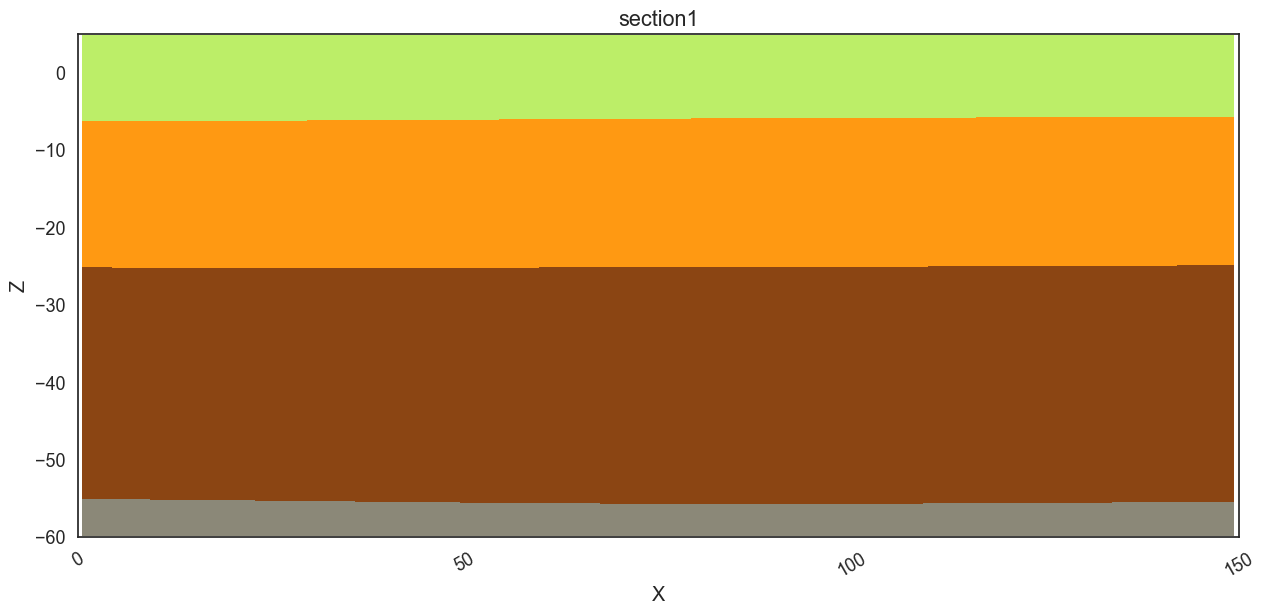

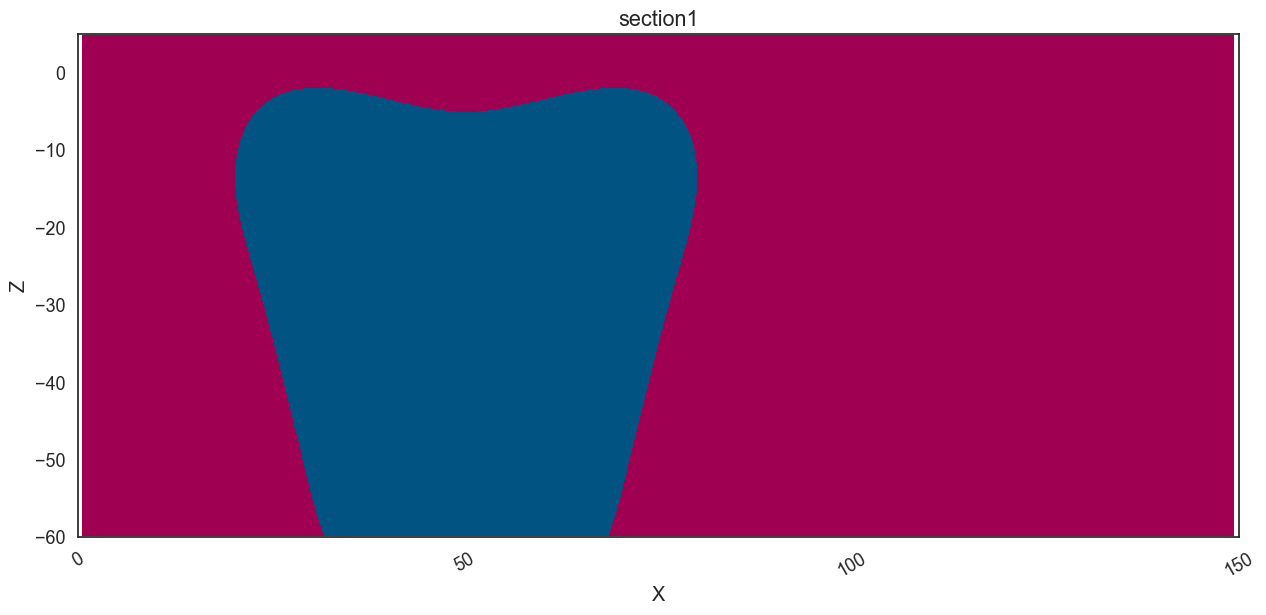

In [5]:
world_layers = get_geometry(geo_model_layers,'section1',ignore = [],zshift = True, show = False)
world_diatreme = get_geometry(geo_model_diatreme,'section1',ignore = ['Basement'],zshift = True, show = False)

# HERE IS WHERE IT GOES WRONG

In [16]:
#world_combined = world_layers + world_diatreme
world_combined = mt.merge2Meshes(world_layers,world_diatreme)

In [ ]:
# HEER IS WHERE IT GOES WRONG
world_combined = mt.createMesh(world_combined)
fig, ax = plt.subplots()   
pg.show(world_combined, ax=ax)

In [17]:
# basement
world_combined.addRegionMarker([10,-63], 1)
world_combined.addRegionMarker([100,-63], 1)
world_combined.addRegionMarker([35,-63], 1)
# CSS
world_combined.addRegionMarker([10,-46], 2)
world_combined.addRegionMarker([100,-46], 2)
# SS
world_combined.addRegionMarker([10,-21], 3)
world_combined.addRegionMarker([100,-21], 3)
# Soil
world_combined.addRegionMarker([10,-6], 4)
# Diatreme
world_combined.addRegionMarker([35,-46], 5)
world_combined.addRegionMarker([35,-21], 5)
world_combined.addRegionMarker([35,-9], 5)

In [ ]:
# Create new mesh with corrected regions
mt.createMesh(world_combined)
fig, ax = plt.subplots()   
pg.show(world_combined, ax=ax)
ax.set_title('Mesh with correct Region assignment', fontdict={'fontsize':25})
# Notes
plt.text(2.8, 34, 'Soil', horizontalalignment='center', bbox=dict(facecolor='magenta', alpha=0.5))
plt.text(3, 26, 'SS', horizontalalignment='center', bbox=dict(facecolor='green', alpha=0.5))
plt.text(3.2, 13, 'CSS', horizontalalignment='center', bbox=dict(facecolor='red', alpha=0.5))
plt.text(3.3, 4.3, 'Basement', horizontalalignment='center', bbox=dict(facecolor='cyan', alpha=0.5))
plt.text(1.3, 26, 'Diatreme', horizontalalignment='center', bbox=dict(facecolor='yellow', alpha=0.5))